## **LOAD DATASET KARTU KREDIT**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
print("Sepuluh data pertama:")
print(df.head())

Sepuluh data pertama:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V2

In [ ]:
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-

In [ ]:
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


## **PRE-PROCESSING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

**Missing values**

In [ ]:
# Cek missing values
print("Jumlah missing values:")
print(df.isnull().sum())

Jumlah missing values:
Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
# perbaiki missing values

df = df.dropna()

In [ ]:
print("\nJumlah missing values setelah dibersihkan:")
print(df.isnull().sum())


Jumlah missing values setelah dibersihkan:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Normalisasi**

In [ ]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))


**outlier amount**

In [ ]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Filter out data outlier
df = df[(df['Amount'] >= Q1 - 1.5 * IQR) & (df['Amount'] <= Q3 + 1.5 * IQR)]

**Klasifikasi Kategori untuk Tujuan Visualisasi**

In [ ]:
df['Class'] = df['Class'].map({0: 'Normal', 1: 'Fraud'})

**Cek distribusi setelah cleaning**

In [ ]:
print("\nDistribusi Kategori Transaksi (Setelah Preprocessing):")
print(df['Class'].value_counts())


Distribusi Kategori Transaksi (Setelah Preprocessing):
Class
Normal    8698
Fraud       34
Name: count, dtype: int64


**Kembalikan ke numerik untuk training nanti**

In [ ]:
df['Class'] = df['Class'].map({'Normal': 0, 'Fraud': 1})

In [ ]:
# Simpan hasil pre-processing ke file CSV
df.to_csv('creditcard_cleaned.csv', index=False)

print("Dataset berhasil disimpan sebagai 'creditcard_cleaned.csv'")


Dataset berhasil disimpan sebagai 'creditcard_cleaned.csv'


## **Exploratory Data Analysis (EDA)**

**Visualisasi Distribusi Transaksi Normal vs Penipuan**



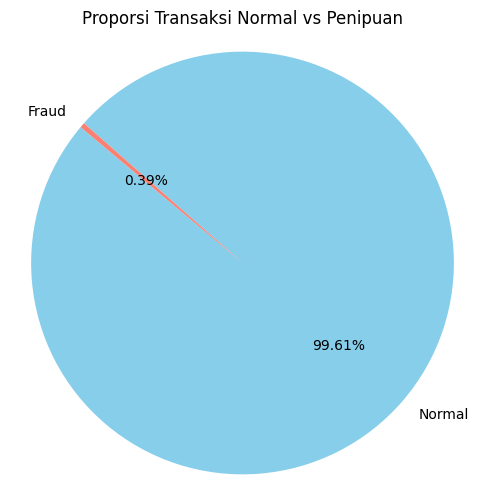

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset hasil pre-processing
df = pd.read_csv('creditcard_cleaned.csv')

# Hitung jumlah tiap kelas
labels = ['Normal', 'Fraud']
sizes = df['Class'].value_counts()
colors = ['skyblue', 'salmon']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Proporsi Transaksi Normal vs Penipuan')
plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
plt.show()


**Analisis korelasi antar fitur**


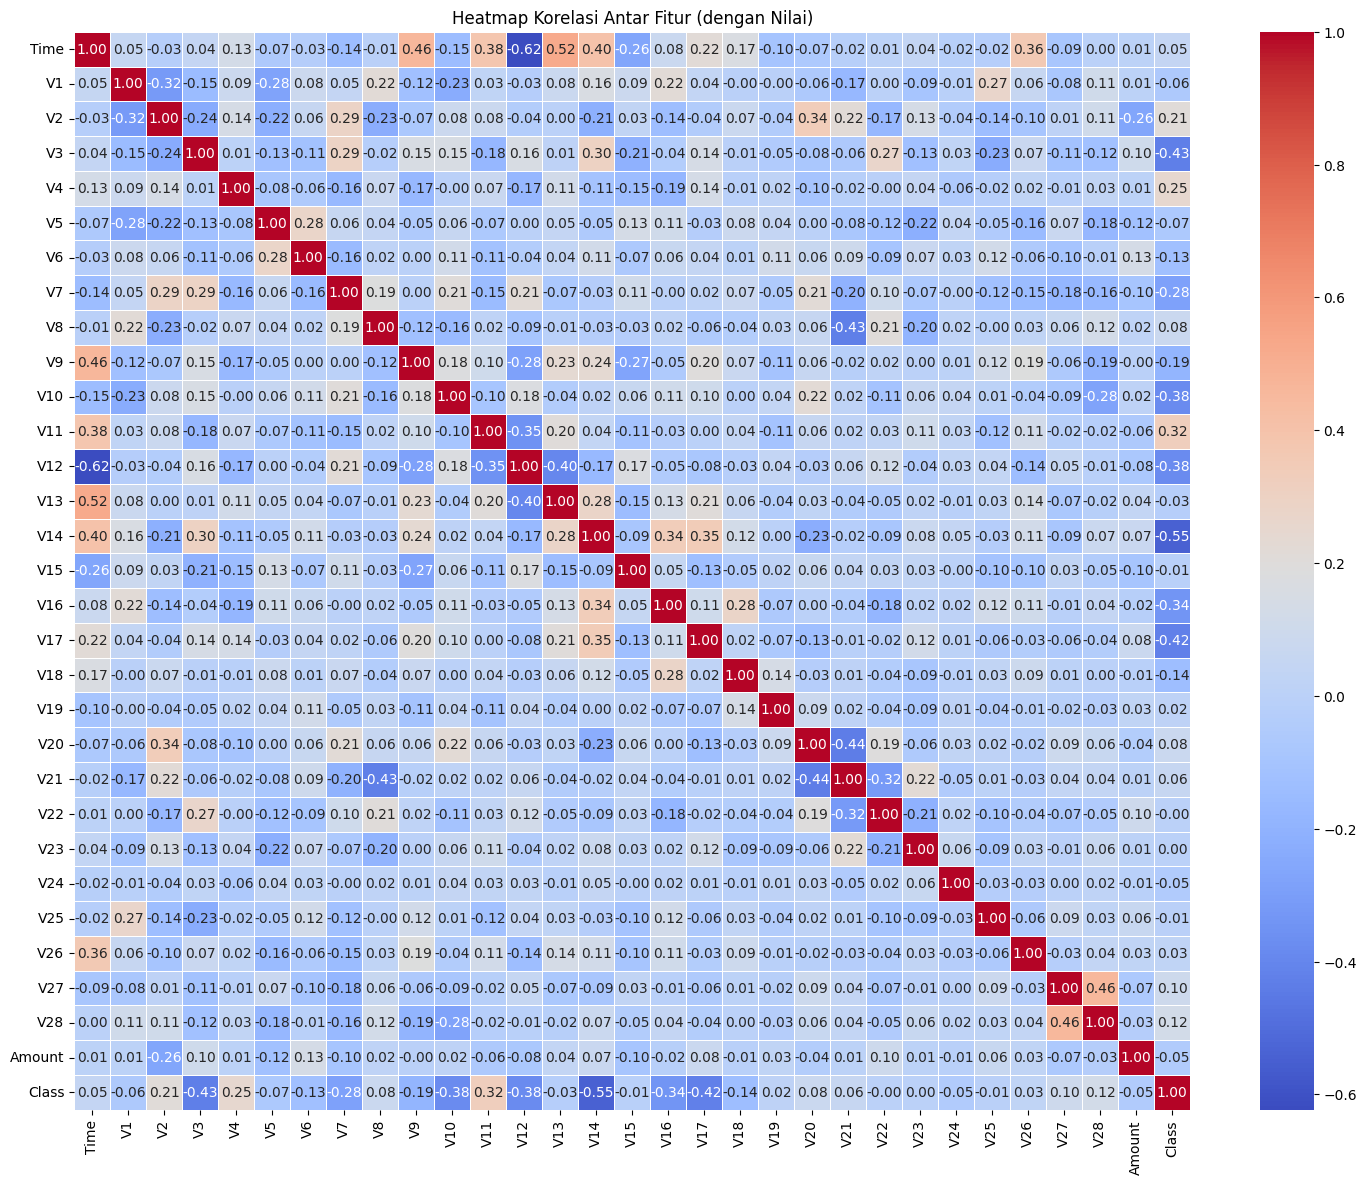

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar fitur
corr_matrix = df.corr()

# Plot heatmap korelasi dengan angka
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur (dengan Nilai)')
plt.show()


**Pemetaan fitur penting yang bisa membedakan transaksi penipuan dari transaksi normal**


INI YANG TOP 10 SAJA

<ipython-input-19-1ac4656aacaa>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


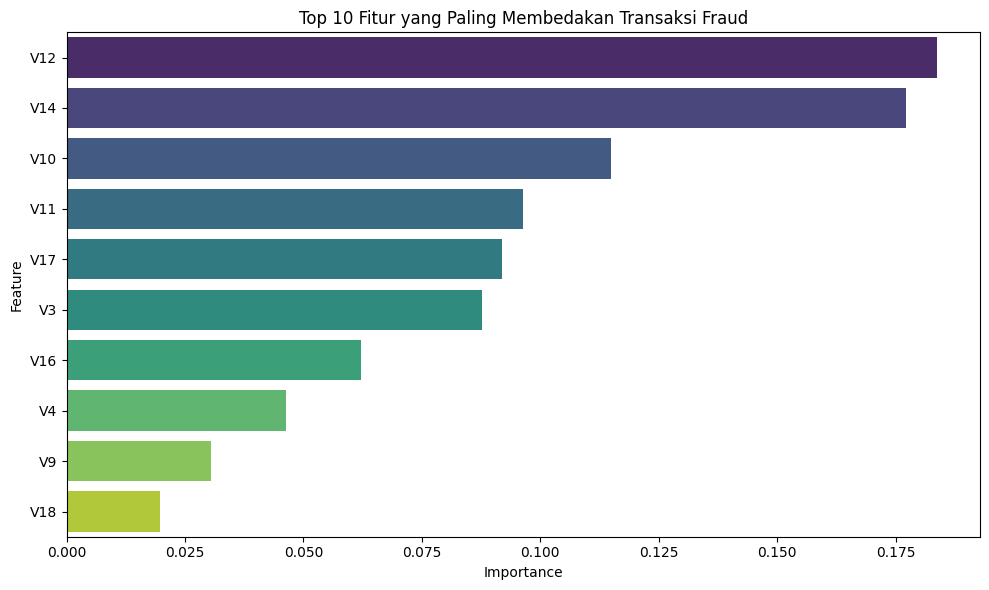

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan target
X = df.drop('Class', axis=1)
y = df['Class']

# Latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Ambil nilai pentingnya
importances = model.feature_importances_
feature_names = X.columns

# Buat dataframe dan urutkan
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi 10 fitur terpenting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Fitur yang Paling Membedakan Transaksi Fraud')
plt.tight_layout()
plt.show()


INI SEMUA FITUR

<ipython-input-20-d6f40f10a2cb>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


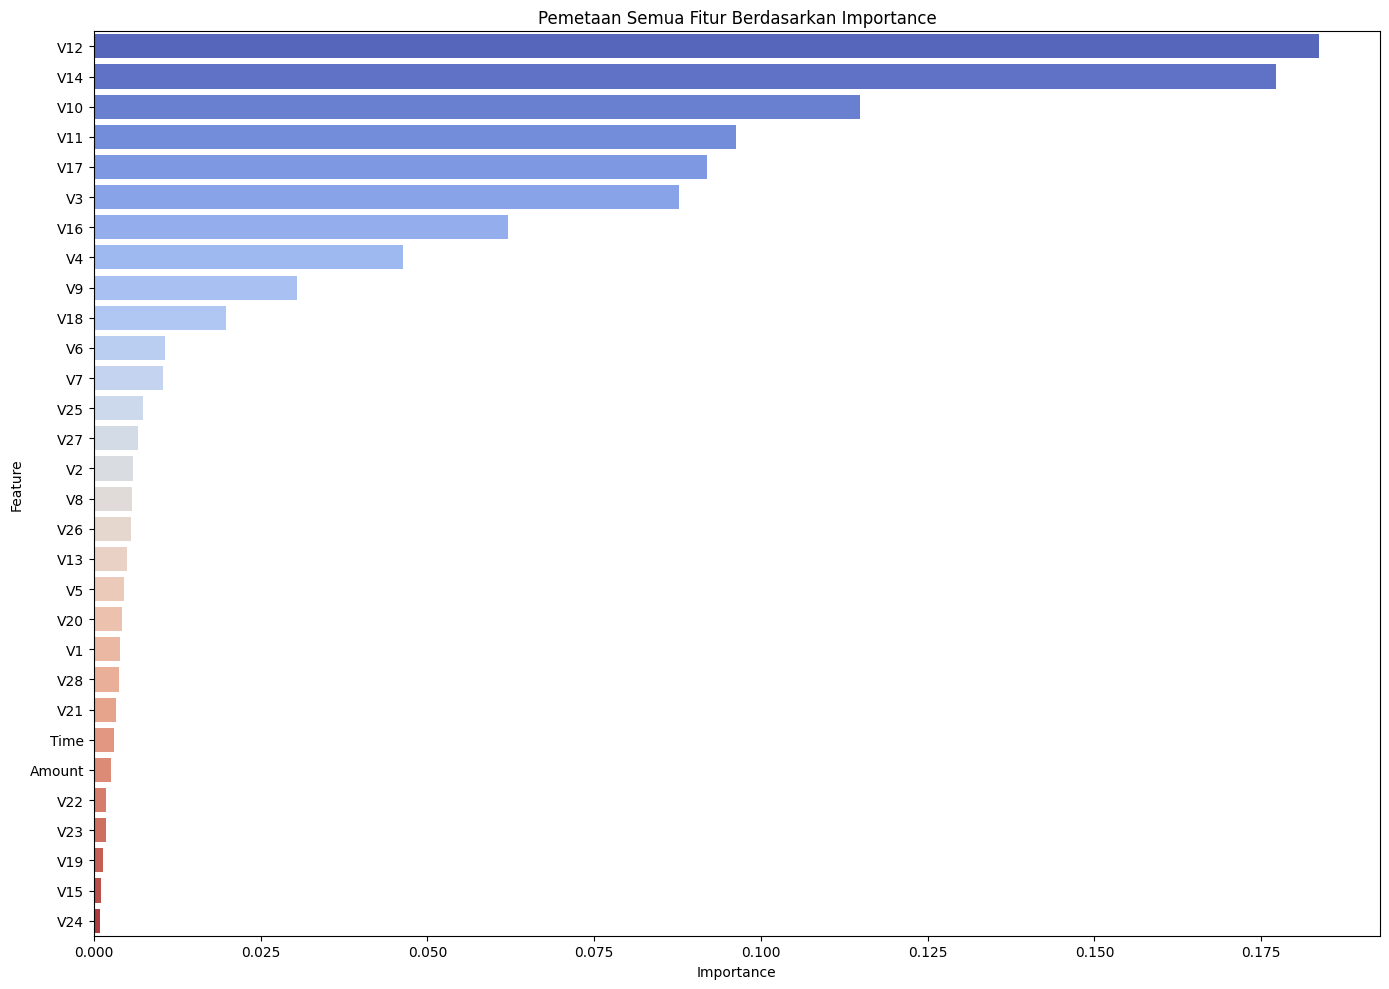

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan target
X = df.drop('Class', axis=1)
y = df['Class']

# Latih model Random Forest (sementara, untuk analisis fitur)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Ambil nilai feature importance
importances = model.feature_importances_
feature_names = X.columns

# Buat dataframe dan urutkan
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi semua fitur
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Pemetaan Semua Fitur Berdasarkan Importance')
plt.tight_layout()
plt.show()


## **Pemisahan Data dan SMOTE**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Pisahkan fitur dan target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data menjadi train dan test (stratify agar proporsi kelas tetap)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Distribusi sebelum SMOTE:", Counter(y_train))

# Terapkan SMOTE pada data latih
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Distribusi setelah SMOTE:", Counter(y_train_smote))


Distribusi sebelum SMOTE: Counter({0: 6958, 1: 27})
Distribusi setelah SMOTE: Counter({0: 6958, 1: 6958})


## **Pelatihan Model dan Evaluasi**

**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Latih model Random Forest pada data hasil SMOTE
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Prediksi pada data uji
rf_preds = rf_model.predict(X_test)

# Evaluasi
print("=== Evaluasi Model: Random Forest ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))
print("\nClassification Report:")
print(classification_report(y_test, rf_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_preds))


=== Evaluasi Model: Random Forest ===
Confusion Matrix:
[[1740    0]
 [   1    6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1740
           1       1.00      0.86      0.92         7

    accuracy                           1.00      1747
   macro avg       1.00      0.93      0.96      1747
weighted avg       1.00      1.00      1.00      1747

ROC-AUC Score: 0.9285714285714286


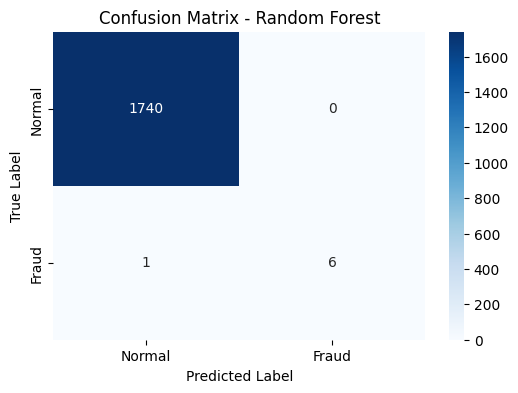

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, rf_preds)

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**XGboost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Latih model XGBoost pada data hasil SMOTE
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Prediksi pada data uji
xgb_preds = xgb_model.predict(X_test)

# Evaluasi
print("=== Evaluasi Model: XGBoost ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))
print("\nClassification Report:")
print(classification_report(y_test, xgb_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_preds))


=== Evaluasi Model: XGBoost ===
Confusion Matrix:
[[1740    0]
 [   1    6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1740
           1       1.00      0.86      0.92         7

    accuracy                           1.00      1747
   macro avg       1.00      0.93      0.96      1747
weighted avg       1.00      1.00      1.00      1747

ROC-AUC Score: 0.9285714285714286


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:50:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


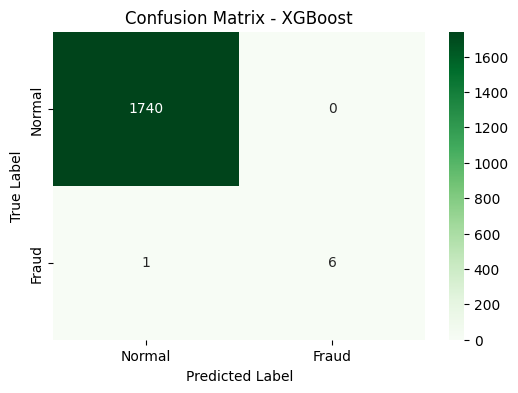

In [ ]:
# Confusion matrix untuk XGBoost
cm_xgb = confusion_matrix(y_test, xgb_preds)

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
